<a href="https://colab.research.google.com/github/lucas-azdias/Clock/blob/main/Ci%C3%AAncia%20da%20Computa%C3%A7%C3%A3o/6%C2%BA%20Per%C3%ADodo/Aprendizagem%20de%20M%C3%A1quina/%5BTAREFAS%5D/Avalia%C3%A7%C3%A3o%20Somativa%2001%20(TDE1%20-%208hrs)/Implementa%C3%A7%C3%A3o%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENVIRONMENT

In [19]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

import numpy as np

import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors


from typing import Iterable

# LOADING DATASETS


##Model Dataset Class

In [20]:
# Class for holding each model dataset
class model_dataset:

    def __init__(self, data:Iterable, labels:Iterable, p:int, k_neighbors:int, random_seed:int) -> None:
        self.data = data
        self.labels = labels

        # Defining the random seed
        self.random_seed = random_seed

        # Defining the common parameters
        self.p = p
        self.k_neighbors = k_neighbors

        # Splitting the model dataset into train/test groups
        self.train_data, self.test_data, self.train_labels, self.test_labels = sklearn.model_selection.train_test_split(
            data,
            labels,
            train_size=0.7,
            test_size=0.3,
            random_state=random_seed
        )


    def plot(self) -> None:
        # Ploting model dataset function
        _, ax = plt.subplots()
        for n_class in range(0, len(np.unique(self.labels))):
            ax.scatter(
                self.data[self.labels==n_class, 0],
                self.data[self.labels==n_class, 1],
                c=tuple(mcolors.BASE_COLORS.keys())[n_class],
                label=str(n_class)
            )
        ax.legend()
        plt.show()


    def analysis(self, predicted_labels:Iterable) -> None:
        # Model analysis function
        print("Accuracy Score:", sklearn.metrics.accuracy_score(self.test_labels, predicted_labels), end="\n\n")
        print(sklearn.metrics.classification_report(self.test_labels, predicted_labels))

        cm = sklearn.metrics.confusion_matrix(self.test_labels, predicted_labels, labels=np.unique(self.train_labels))
        sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(self.train_labels)).plot()

##Loading

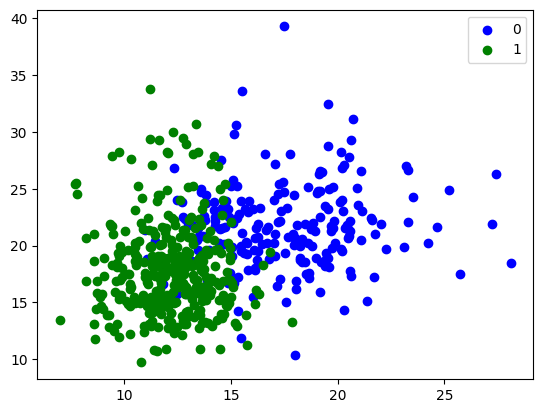

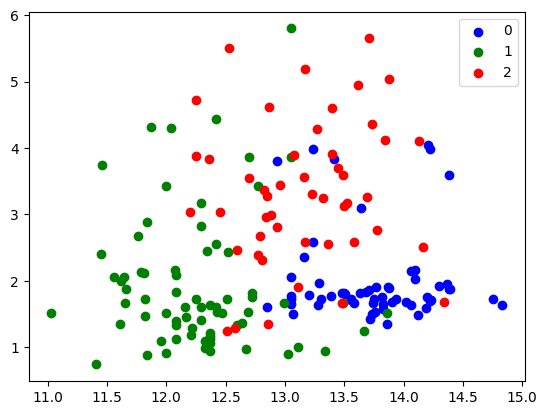

In [21]:
# Loading the models datasets
breast_cancer_model = model_dataset(*sklearn.datasets.load_breast_cancer(return_X_y=True), p=2, k_neighbors=5, random_seed=9999)
wine_model = model_dataset(*sklearn.datasets.load_wine(return_X_y=True), p=2, k_neighbors=5, random_seed=9999)

# Ploting models datasets
breast_cancer_model.plot()
wine_model.plot()

# SCIKIT-LEARN MODEL IMPLEMENTATION


##Breast Cancer Dataset

Accuracy Score: 0.935672514619883

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.96      0.95      0.95       118

    accuracy                           0.94       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



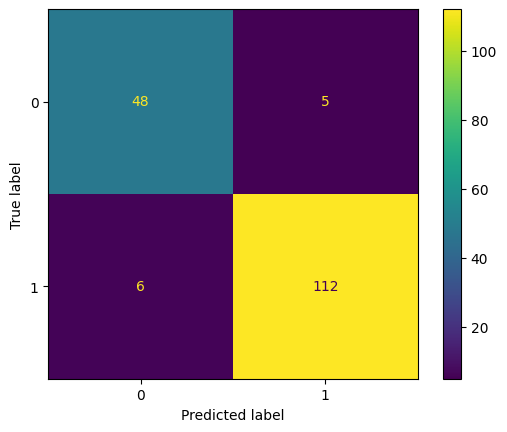

In [22]:
sk_knn = sklearn.neighbors.KNeighborsClassifier(
    metric="minkowski",
    p=breast_cancer_model.p,
    n_jobs=1,
    n_neighbors=breast_cancer_model.k_neighbors
)

# Train the model
sk_knn.fit(breast_cancer_model.train_data, breast_cancer_model.train_labels)

# Test the model
predicted_labels = sk_knn.predict(breast_cancer_model.test_data)

# Model analysis
breast_cancer_model.analysis(predicted_labels)

##Wine Dataset

Accuracy Score: 0.7407407407407407

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.78      0.67      0.72        21
           2       0.61      0.65      0.63        17

    accuracy                           0.74        54
   macro avg       0.74      0.75      0.74        54
weighted avg       0.74      0.74      0.74        54



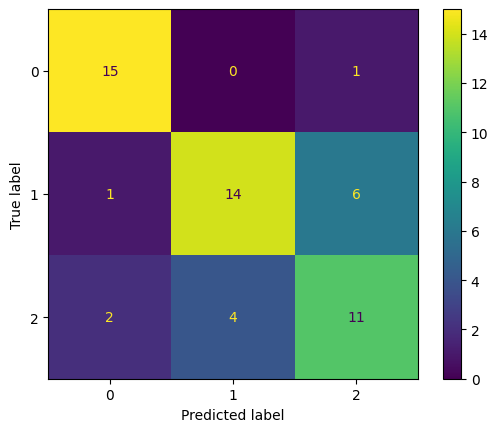

In [23]:
sk_knn = sklearn.neighbors.KNeighborsClassifier(
    metric="minkowski",
    p=wine_model.p,
    n_jobs=1,
    n_neighbors=wine_model.k_neighbors
)

# Train the model
sk_knn.fit(wine_model.train_data, wine_model.train_labels)

# Test the model
predicted_labels = sk_knn.predict(wine_model.test_data)

# Model analysis
wine_model.analysis(predicted_labels)

# OWN MODEL IMPLEMENTATION


##Implementation

In [24]:
class knn():

    def __init__(self, p:int, k_neighbors:int) -> None:
        self.p = p
        self.k_neighbors = k_neighbors


    def __minkowski(self, u:Iterable, v:Iterable) -> float:
        if len(u) != len(v):
            raise ValueError("Vectors of different sizes passed as arguments")

        # distance = 0
        # for i in range(0, len(u)):
        #     distance += np.power(np.abs(u[i] - v[i]), self.p)

        distance = np.sum(np.power(np.abs(np.subtract(u, v)), self.p))

        distance = np.power(distance, np.divide(1, self.p))

        return distance


    def fit(self, data, labels) -> None:
        self.data = data
        self.labels = labels


    def predict(self, data) -> tuple:
        labels = list()
        for instance in data:
            distances = list()
            for i in range(0, len(self.data)):
                distances.append((self.__minkowski(instance, self.data[i]), self.labels[i]))

            distances.sort(key=lambda x: x[0])

            votes = {k: 0 for k in np.unique(self.labels)}
            for i in range(0, self.k_neighbors):
                votes[distances[i][1]] += 1

            # print(votes, max(*votes.items(), key=lambda x: x[1])[0])

            labels.append(max(*votes.items(), key=lambda x: x[1])[0])

        return tuple(labels)

##Breast Cancer Dataset

Accuracy Score: 0.935672514619883

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.96      0.95      0.95       118

    accuracy                           0.94       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



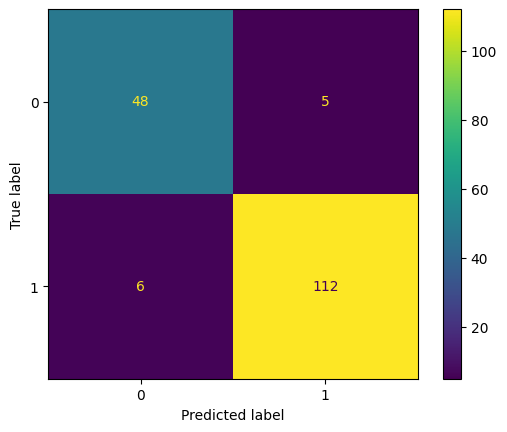

In [25]:
own_knn = knn(p=breast_cancer_model.p, k_neighbors=breast_cancer_model.k_neighbors)

# Train the model
own_knn.fit(breast_cancer_model.train_data, breast_cancer_model.train_labels)

# Test the model
predicted_labels = own_knn.predict(breast_cancer_model.test_data)

# Model analysis
breast_cancer_model.analysis(predicted_labels)

##Wine Dataset

Accuracy Score: 0.7407407407407407

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.78      0.67      0.72        21
           2       0.61      0.65      0.63        17

    accuracy                           0.74        54
   macro avg       0.74      0.75      0.74        54
weighted avg       0.74      0.74      0.74        54



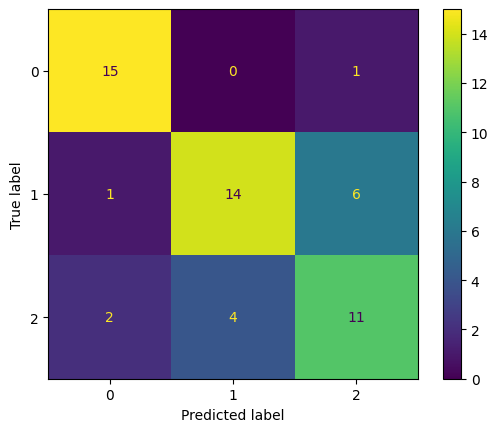

In [26]:
own_knn = knn(p=wine_model.p, k_neighbors=wine_model.k_neighbors)

# Train the model
own_knn.fit(wine_model.train_data, wine_model.train_labels)

# Test the model
predicted_labels = own_knn.predict(wine_model.test_data)

# Model analysis
wine_model.analysis(predicted_labels)